# Pizza I4 Architecture - Pizza Production Experiment Analysis

In [2]:
# Install Dependencies
!pip install pandas matplotlib seaborn numpy scipy jupyterlab

  Using cached pandas-2.3.3-cp313-cp313-macosx_10_13_x86_64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached markupsafe-3.0.3-cp313-cp313-macosx_10_13_x86_64.whl.metadata (2.7 kB)
  Using cached charset_normalizer-3.4.4-cp313-cp313-macosx_10_13_universal2.whl.metadata (37 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
Using cached pandas-2.3.3-cp313-cp313-macosx_10_13_x86_64.whl (11.5 MB)
   ━━━━━━━━━━━━━━━━━━

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Order Analysis

In [16]:
# --- 1. Import the data ---
order_df = pd.read_csv('order-data.csv')

In [17]:
# --- 2. Remove rows with null or NaN values ---
# This filters the data down to only completed orders.
completed_orders_df = order_df.dropna().copy()
print(f"Original rows: {len(order_df)}, Rows remaining after cleaning: {len(completed_orders_df)}")


Original rows: 9, Rows remaining after cleaning: 7


In [18]:
# --- 3. Transform the timestamps into seconds value ---
# Convert timestamps (in milliseconds) to datetime objects
completed_orders_df['START_TIME'] = pd.to_datetime(completed_orders_df['STARTTIMESTAMP'], unit='ms')
completed_orders_df['END_TIME'] = pd.to_datetime(completed_orders_df['ENDTIMESTAMP'], unit='ms')

# Calculate the latency in seconds
completed_orders_df['LATENCY_S'] = (
    completed_orders_df['END_TIME'] - completed_orders_df['START_TIME']
).dt.total_seconds()


In [ ]:

# --- 4. Get the average time for all orders ---
avg_latency_s = completed_orders_df['LATENCY_S'].mean()

print(f"\nOverall Average Order Latency (in seconds): {avg_latency_s:.2f}")



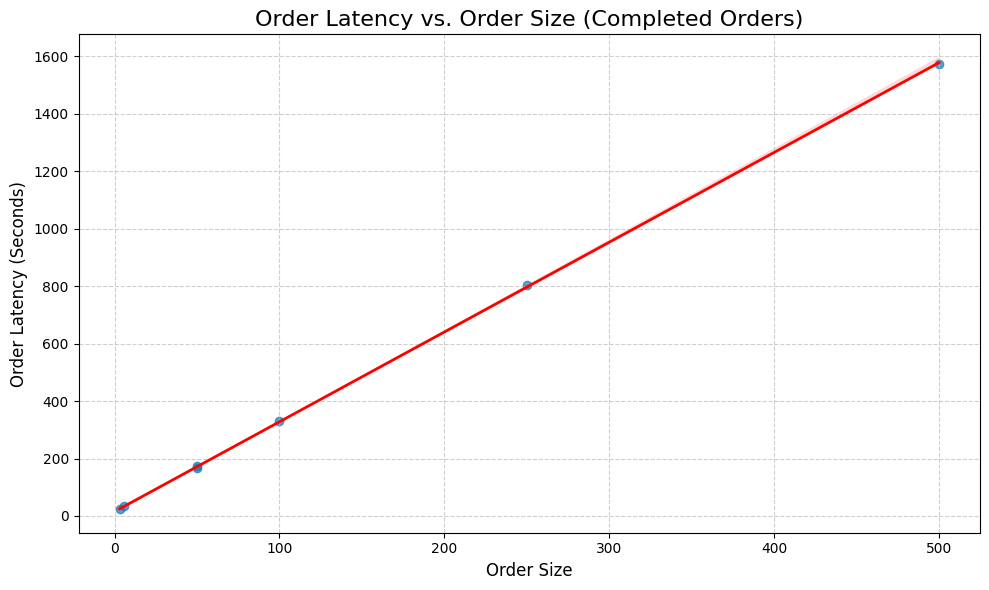


Chart saved as 'order_size_vs_latency_regression.png'


In [19]:
# --- 5. Print a chart with the correlation line ---

# Create the scatter plot with a linear regression line
plt.figure(figsize=(10, 6))

# sns.regplot generates a scatter plot and fits a linear regression model
sns.regplot(
    x='ORDERSIZE',
    y='LATENCY_S',
    data=completed_orders_df,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red', 'linewidth': 2}
)

# Set title and labels
plt.title('Order Latency vs. Order Size (Completed Orders)', fontsize=16)
plt.xlabel('Order Size', fontsize=12)
plt.ylabel('Order Latency (Seconds)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

# Save the plot to a file
plt.savefig('order_size_vs_latency_regression.png')
plt.close()

print("\nChart saved as 'order_size_vs_latency_regression.png'")

## Pizza Analysis

--- Starting Pizza Data Analysis ---
Original pizza rows: 1067, Rows remaining after cleaning: 1057

Overall Average Pizza Latency: 23.08 seconds

Average Pizza Latency per Order ID (First 5):
   S_ORDER_ID  LATENCY_S
0         153  24.003531
1         159  16.174667
2         271  21.833370
3         308  21.184040
4         317  21.880840

Average Pizza Latency by ORDERSIZE:
   ORDERSIZE  LATENCY_S
0          3  16.174667
1          6  20.362833
2         50  21.532440
3        100  22.896306
4        250  26.432159
5        500  21.838604


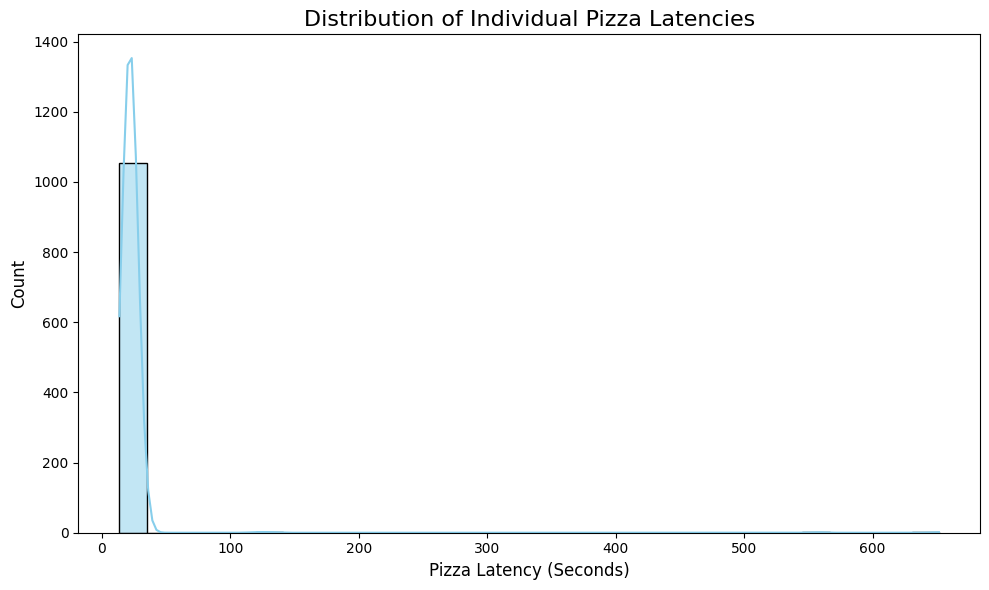

Saved: pizza_latency_distribution.png


/var/folders/04/jrv90yp55ns1_z5wxk0c5vbr0000gn/T/ipykernel_29705/2953474278.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


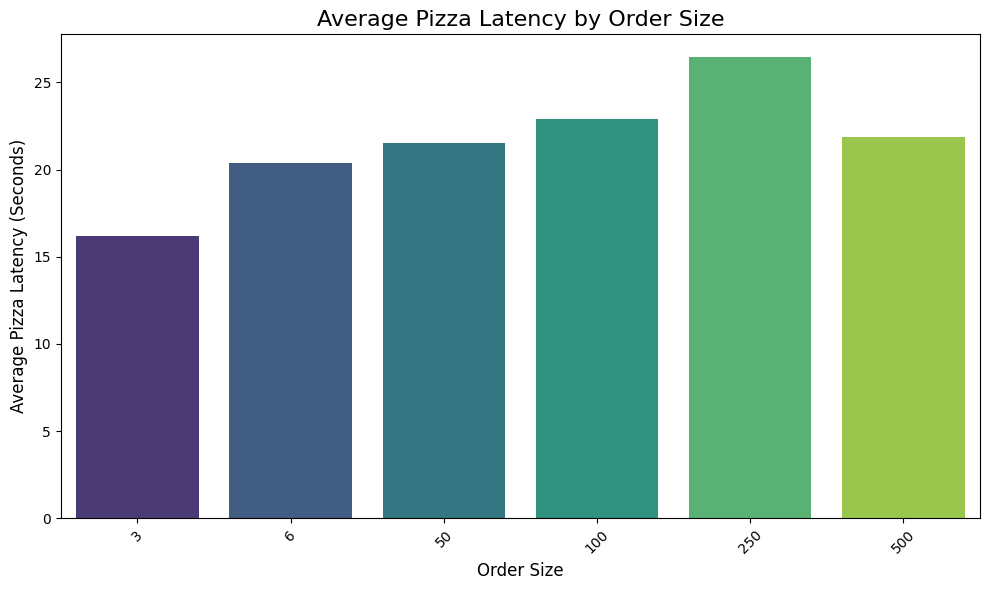

Saved: avg_pizza_latency_by_ordersize.png

--- Pizza Analysis Complete ---


In [24]:

# --- 1. Load Data, Clean, and Transform ---
print("--- Starting Pizza Data Analysis ---")
pizza_df = pd.read_csv('pizza-data.csv')

# Clean: Remove rows with null ENDTIMESTAMP or LATENCYMS (i.e., incomplete pizzas)
completed_pizzas_df = pizza_df.dropna().copy()
print(f"Original pizza rows: {len(pizza_df)}, Rows remaining after cleaning: {len(completed_pizzas_df)}")

# Transform: Calculate LATENCY_S (Latency in Seconds)
completed_pizzas_df['START_TIME'] = pd.to_datetime(completed_pizzas_df['STARTTIMESTAMP'], unit='ms')
completed_pizzas_df['END_TIME'] = pd.to_datetime(completed_pizzas_df['ENDTIMESTAMP'], unit='ms')
completed_pizzas_df['LATENCY_S'] = (
    completed_pizzas_df['END_TIME'] - completed_pizzas_df['START_TIME']
).dt.total_seconds()

# --- 2. Calculate Averages ---

# a) Average of all pizzas
avg_all_pizzas_s = completed_pizzas_df['LATENCY_S'].mean()
print(f"\nOverall Average Pizza Latency: {avg_all_pizzas_s:.2f} seconds")

# b) Average time of pizzas of the same order
avg_pizza_latency_per_order = completed_pizzas_df.groupby('S_ORDER_ID')['LATENCY_S'].mean().reset_index()
print("\nAverage Pizza Latency per Order ID (First 5):")
print(avg_pizza_latency_per_order.head())

# --- 3. Other Needed Analysis: Merge with Order Size ---

# Load Order Data to get ORDERSIZE
order_df = pd.read_csv('order-data.csv')[['ORDERID', 'ORDERSIZE']]

# Merge datasets on Order ID (S_ORDER_ID in pizza data maps to ORDERID in order data)
merged_df = completed_pizzas_df.merge(
    order_df,
    left_on='S_ORDER_ID',
    right_on='ORDERID',
    how='left'
)

# Calculate average pizza latency grouped by ORDERSIZE
avg_pizza_latency_by_ordersize = merged_df.groupby('ORDERSIZE')['LATENCY_S'].mean().reset_index()
print("\nAverage Pizza Latency by ORDERSIZE:")
print(avg_pizza_latency_by_ordersize)


# --- 4. Visualization ---

# a) Pizza Latency Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['LATENCY_S'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Individual Pizza Latencies', fontsize=16)
plt.xlabel('Pizza Latency (Seconds)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('pizza_latency_distribution.png')
# Show the plot
plt.tight_layout()
plt.show()

plt.close()
print("Saved: pizza_latency_distribution.png")



# b) Average Pizza Latency by Order Size (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='ORDERSIZE',
    y='LATENCY_S',
    data=avg_pizza_latency_by_ordersize,
    palette='viridis'
)
plt.title('Average Pizza Latency by Order Size', fontsize=16)
plt.xlabel('Order Size', fontsize=12)
plt.ylabel('Average Pizza Latency (Seconds)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_pizza_latency_by_ordersize.png')
# Show the plot
plt.tight_layout()
plt.show()
plt.close()
print("Saved: avg_pizza_latency_by_ordersize.png")

print("\n--- Pizza Analysis Complete ---")